# Structural Patterns

## Facade Pattern

- As problems become larger, systems become more complex, which can add complexity to systen interaction with clients. `Facade` pattern allows a single simplified interface for client classes to interact with subsystem

- No actual functionality is added, `Facades` simply enable single point of entry into the subsystem
    - Wrapper class that encapsulates a subsystem to hide subsystem's complexity


- Main principles:
    - Hide complexity of subsystem by **encapsulating** it behind a wrapper (facade) class
    - Remove the need for client to manage subsystem on their own, **reducing coupling**
    - Provide simplified **interface**

    
- Example
    - Think of consumer behaviour when shopping. You rely on the external "look" of a building to infer what is inside it
    - When an online sales platform sends your order for fulfillment, it hides away all the extra work that is needed before you can receive what you ordered

- Let's imagine a banking system without a facade
    - `Customer` class is composed by `Chequing`, `Saving`, and `Investment` classes, which are realisations of the `IAccount` interface
    - Each `Customer` is responsible for knowing and using all methods/attributes in the 3 composition classes
    - Not great!

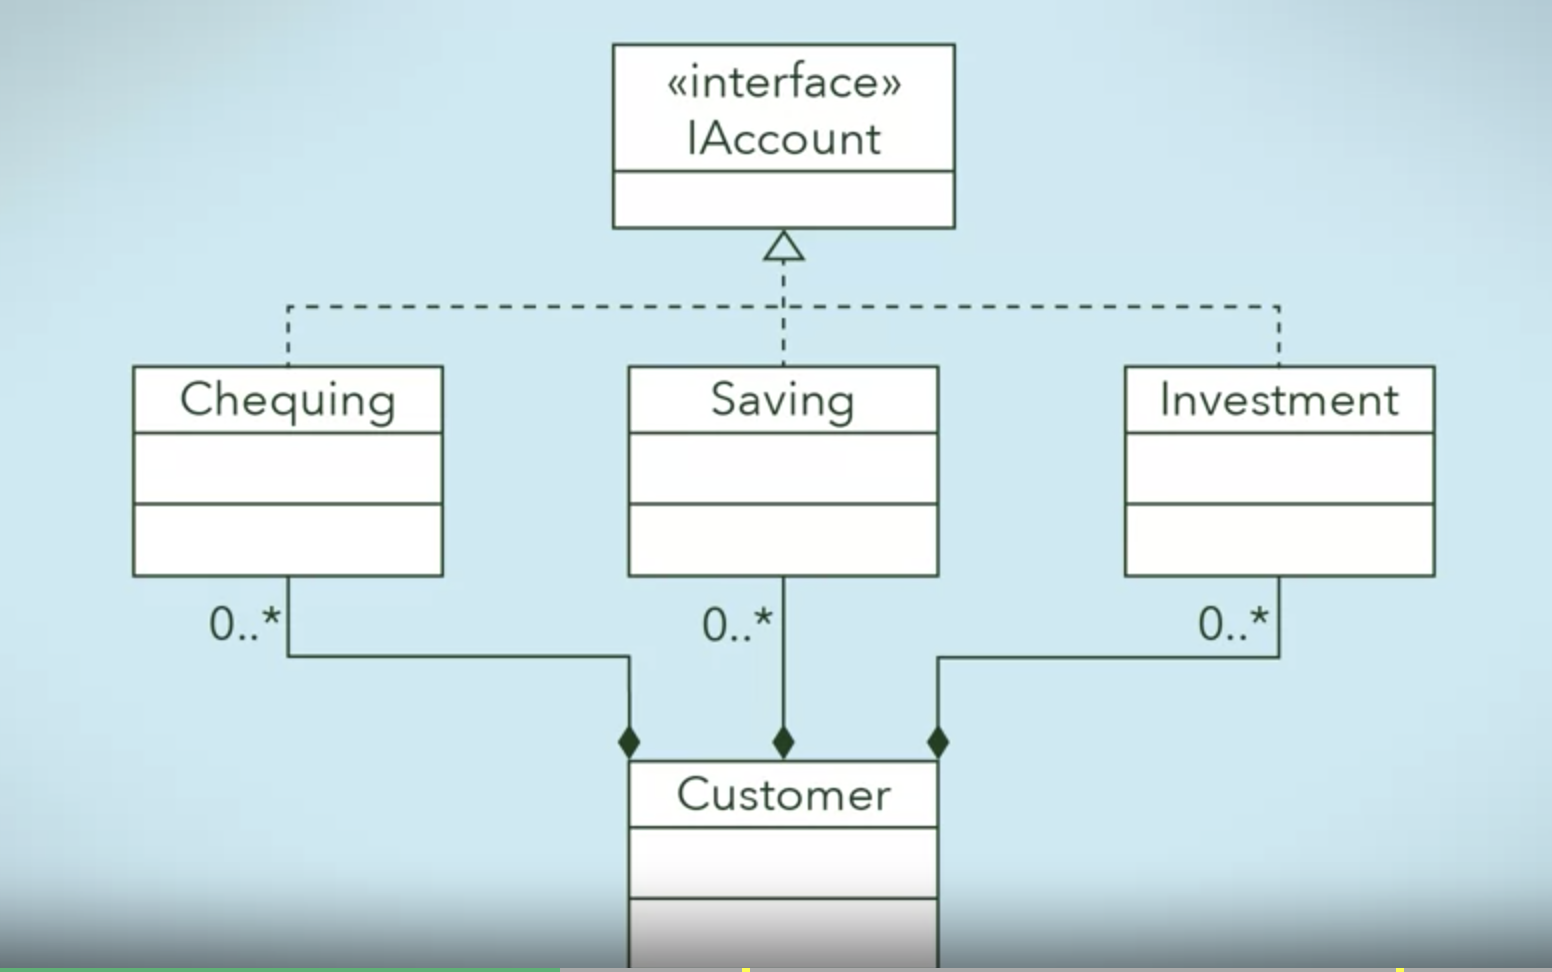

- Let's try redesigning this
- Instead of having customers manage each subclass directly, we implement a facade class `BankService` that the `Customer` interacts with
    - `BankService` does the necessary procesing work on your behalf
    - Think of this as the teller at the bank that helps to manage your FX rate, or helps to transfer large sums of money on your behalf
    

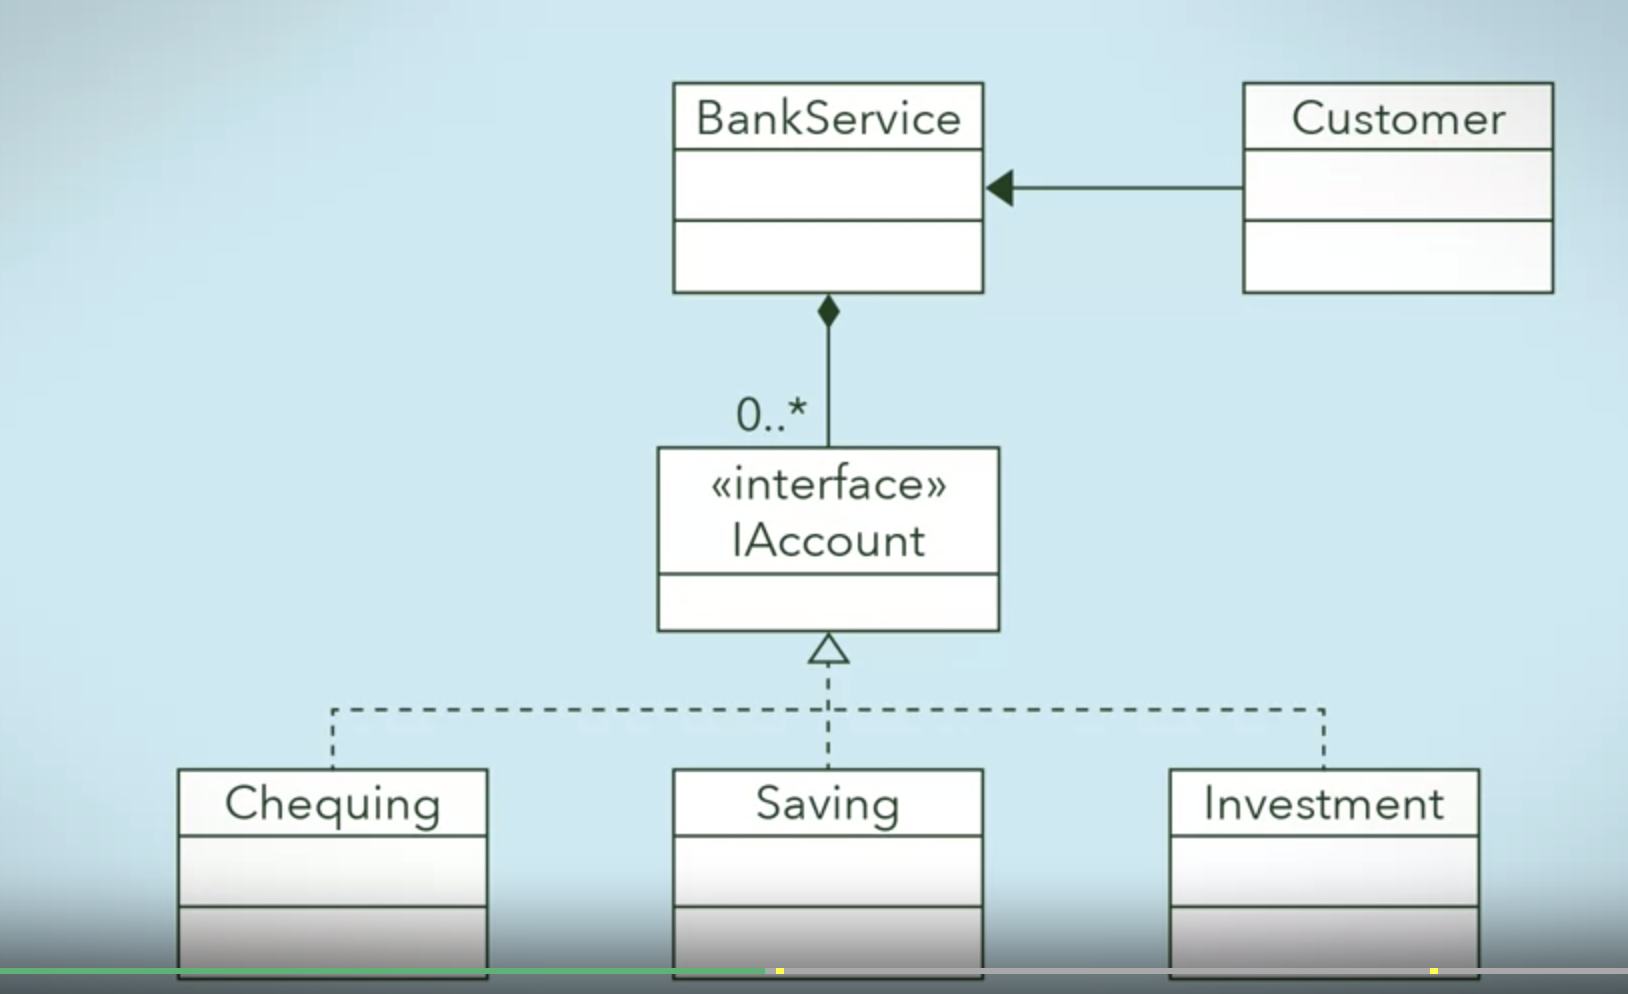

In [ ]:
from abc import abstractmethod, ABCMeta
from typing import Optional

class IAccount(metaclass=ABCMeta):
    
    @abstractmethod
    def deposit(self, amount: float):
        ...
    
    @abstractmethod
    def withdraw(self, amount: float):
        ...
    
    @abstractmethod
    def transfer(self, amount: float):
        ...
    
    @abstractmethod
    def getAccountNumber(self) -> int:
        ...

@IAccount.register
class Chequing(IAccount):

    def __init__(self, initial_amount: float):
        self.initial_amount = initial_amount

    def deposit(self, amount: float) -> None:
        ...

    def withdraw(self, amount: float) -> None:
        ...

    def transfer(self, amount: float, to: IAccount) -> None:
        ...

    def getAccountNumber(self) -> int:
        return 123

@IAccount.register
class Saving(IAccount):

    def __init__(self, initial_amount: float):
        self.initial_amount = initial_amount

    def deposit(self, amount: float) -> None:
        ...

    def withdraw(self, amount: float) -> None:
        ...

    def transfer(self, amount: float, to: IAccount) -> None:
        ...

    def getAccountNumber(self) -> int:
        return 123

@IAccount.register
class Investment(IAccount):

    def __init__(self, initial_amount: float):
        self.initial_amount = initial_amount

    def deposit(self, amount: float) -> None:
        ...

    def withdraw(self, amount: float) -> None:
        ...

    def transfer(self, amount: float, to: IAccount) -> None:
        ...

    def getAccountNumber(self) -> int:
        return 123

class BankService:
    def __init__(self):
        # Information Hiding: Set bank accounts as private attribute to prevent access
        self.__bank_accounts: dict[int, IAccount] = {} 

    def createNewAccount(self, account_type: str, initial_amount: float):
        match account_type:
            case "chequing":
                newAccount = Chequing(initial_amount=initial_amount)
            case "saving":
                newAccount = Saving(initial_amount=initial_amount)
            case "investment":
                newAccount = Investment(initial_amount=initial_amount)
            case _:
                newAccount = None
        
        if newAccount is not None:
            self.__bank_accounts[newAccount.getAccountNumber()] = newAccount

    def transferMoney(self, to_account_number: int, from_account_number: int, amount: float):
        to_account: Optional[IAccount] = self.__bank_accounts.get(to_account_number)
        from_account: Optional[IAccount] = self.__bank_accounts.get(from_account_number)
        from_account.transfer(amount=amount, to=to_account)

class Customer:
    def __init__(self):

        # Only need to know bank service's methods, without needing to know the internals of each `Account` type
        self.myBankingService = BankService()

        self.mySaving = self.myBankingService.createNewAccount("saving", float(12345))
        self.myInvestment = self.myBankingService.createNewAccount("inveset", float(12345))

        self.myBankingService.transferMoney(from_account_number=12345, to_account_number=23456, amount=123)

## Adaptor Pattern

- Imagine you have 2 classes, A and B, that need to talk to each other. 
    - But they were not designed to be compatible
    - The outputs from A does not conform to the inputs to B
    - Solution: Use an adaptor class 

- Adaptor
    - Conforms to what the client expects to see
    - Client sends request to the target interface
    - Adaptor modifies the request into something the adaptee can understand, and sends to adaptee
    - Usually implemented as a wrapper

- Why not just change your underlying classes?
    - What if you have multiple clients using one component? Changing the inputs/outputs may break production code!
    - Changing can be very complex

- Example
    - We have a pre-existing `WebClient` that we want to use to talk to `WebService`
    - `WebClient` expects to send any object in the request, but `WebService` expects only JSON
    - Solution: Use adaptor to convert object into JSON object

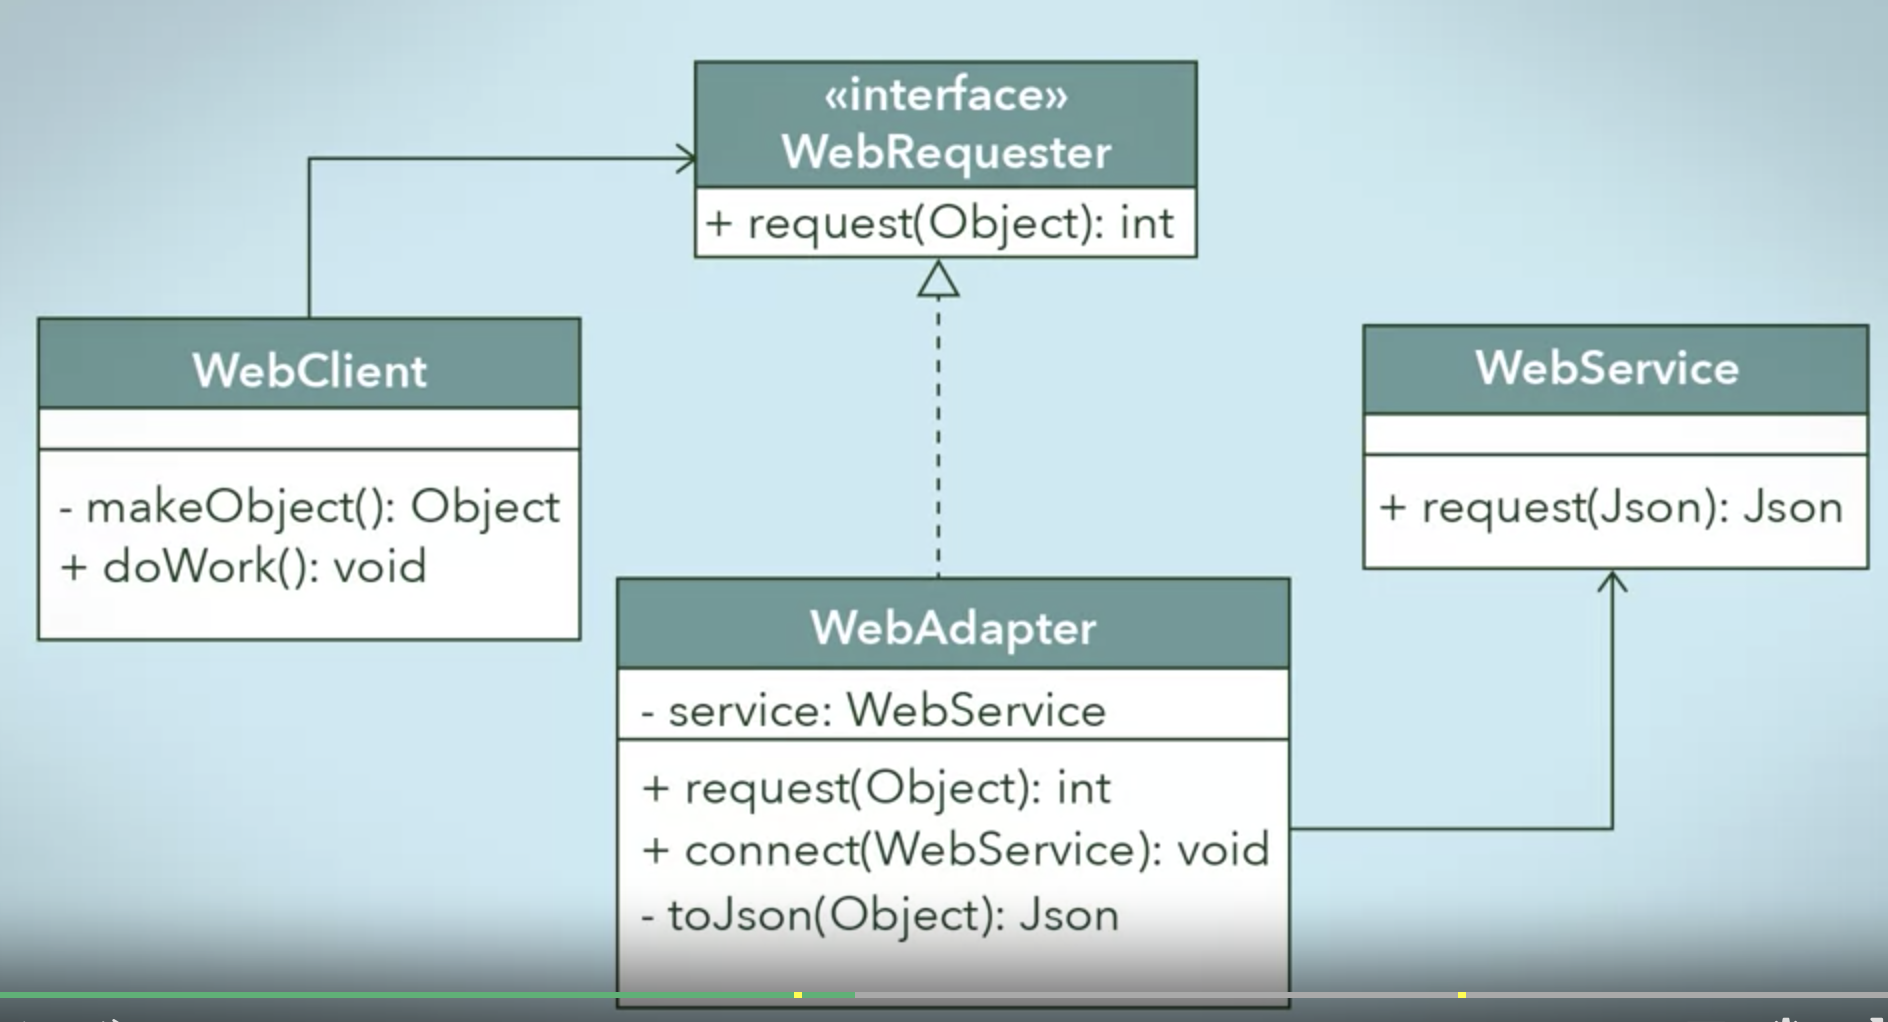

In [ ]:
from abc import ABCMeta, abstractmethod
from typing import Any, Optional
import json

class WebRequester(metaclass=ABCMeta):
    @abstractmethod
    def make_request(request: Any) -> int:
        ...

@WebRequester.register
class WebAdapter:
    def __init__(self):
        self.__web_service: Optional[WebService] = None
        
    @property
    def web_service(self):
        return self.__web_service
    
    @web_service.setter    
    def web_service(self, currentService: WebService):
        self.__web_service = currentService

    def connect(self, currentService: WebService):
        self.web_service = currentService

    def make_request(self, request: Any) -> int:
        result: dict[str, Any] = json.loads(request)
        response: dict[str, Any] = self.web_service.request(result)
        if response != None:
            return 200
        return 500

    def __toJson(self, input: Any) -> dict[str, Any]:
        ...

class WebClient:
    def __init__(self):
        self.__web_requester: Optional[WebRequester] = None
    
    @property
    def web_requester(self):
        return self.__web_requester
    
    @web_requester.setter
    def web_requester(self, webRequester: WebRequester):
        self.web_requester = webRequester
    
    def __make_object(self) -> Any:
        ...
    
    def do_work(self):
        object: Any = self.__make_object()
        status: int = self.web_requester.make_request(request=object)

        if status == 200:
            print('Ok')
        else:
            print('Not ok')
        return
    
class Program:
    def main(self, args: list[str]):
        webHost: str = "Host: https://google.com\n\r"
        service: WebService = WebService(webHost)
        adapter: WebAdapter = WebAdapter()
        adapter.connect(service)
        client: WebClient = WebClient(adapter)
        client.do_work()

## Composite Pattern

- Buildings are composed of rooms. They are different, but treated as similar and can do similar things. Despite being different objects, they can be treated uniformly
    - You can enter and building and a room
    - You can store stuff in a building and a room
    
- Uniform treatment can be enabled by enabling `polymorphism`
    - All implementing classes conform to the same interface

- Abstract superclass can also be used in place of an interface

- **Composite class** is used to aggregate any class that implements the component interface
    - Composite class lets you traverse and manipulate component objects contained by the composite objects
- **Leaf class** represents a non-composite type 
- We want to deal with non-composite and composite objects uniformly
    - To do this, we have the leaf class and composite class implement the component interface
    - In so doing, both are unified with a single type. Both composite and leaf classes are considered subtypes of the component
- **Recursive composition** is possible (composite class contains another composite class)

- The best way to think of this is like a tree
    - There is a root class that is composite
    - Each branch of that root either goes to a leaf class (terminating), or another composite class (non terminating)

- Example: Buildings are a composite of rooms

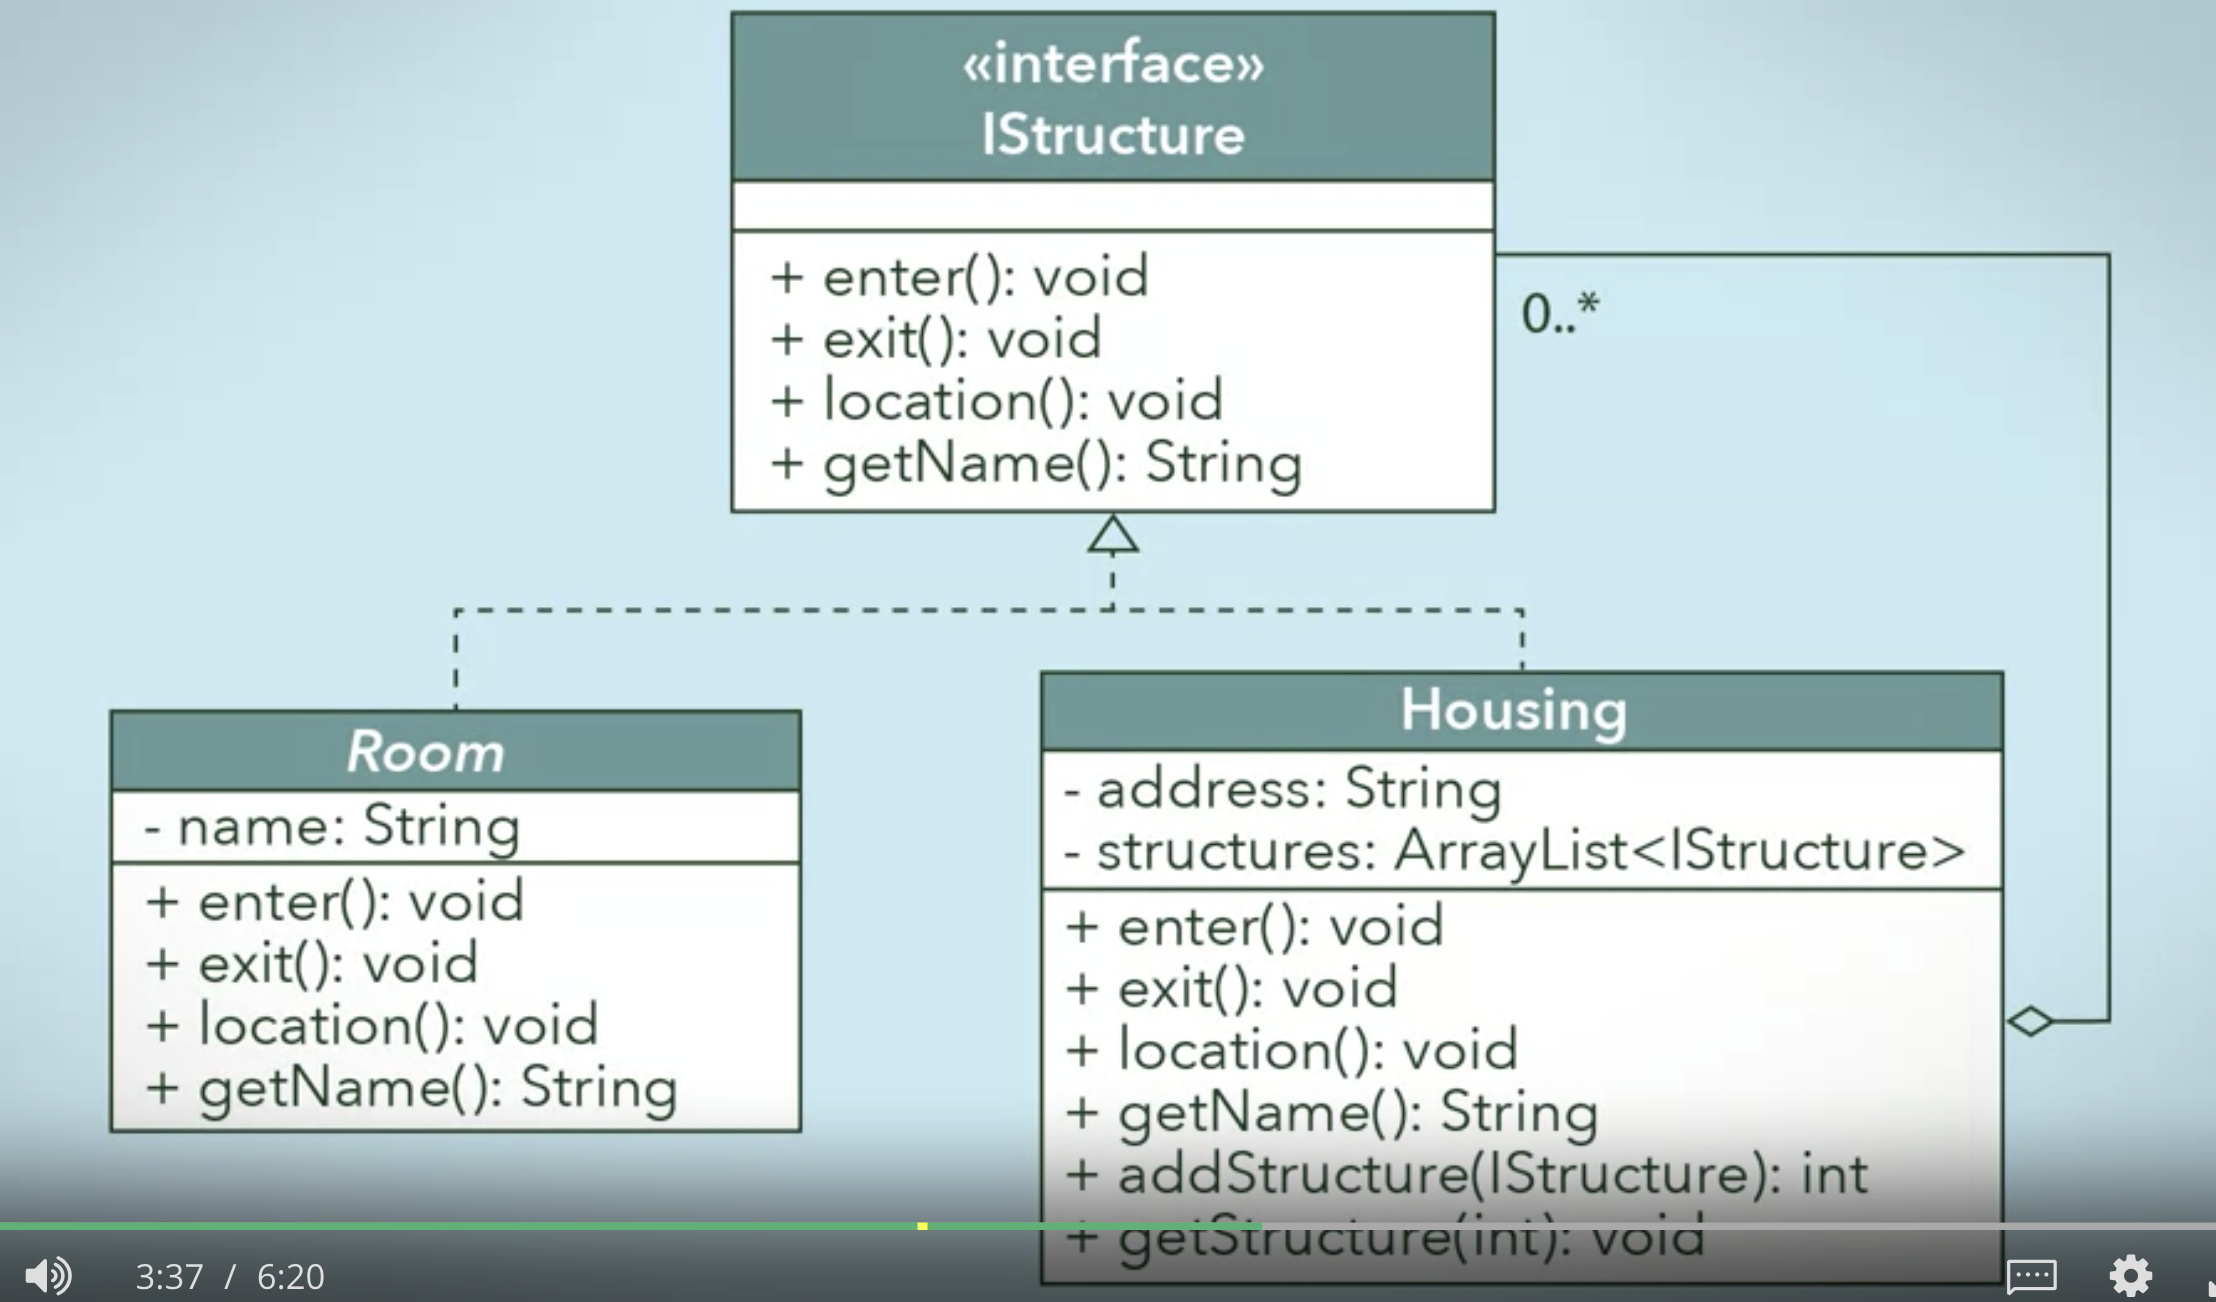

In [ ]:
from abc import ABCMeta, abstractmethod
from typing import Optional, Union

class IStructure(metaclass=ABCMeta):
    @abstractmethod
    def enter(self):
        ...
    
    @abstractmethod
    def exit(self):
        ...

    @abstractmethod
    def location(self):
        ...

    @abstractmethod
    def get_name(self):
        ...

class Housing(IStructure):
    def __init__(self, address: str):
        self.__structures: Optional[list[IStructure]] = []
        self.__address: str = address
    
    def get_name(self):
        return self.__address
    
    def add_structure(self, component: IStructure) -> int:
        self.__structures.append(component)
        return len(self.__structures) - 1
    
    def get_structure(self, component_number: int) -> Union[Housing, Room]:
        return self.__structures[component_number]

    def location(self):
        print(f"Address: {self.__address}")
    
    def enter(self):
        ...

    def exit(self):
        ...

class Room(IStructure):
    def __init__(self, name):
        self.name: str = ''

    def enter(self):
        print(f"You have entered room {self.name}")

    def exit(self):
        print(f"You have exited room {self.name}")

    def location(self):
        print(f"You are in room {self.name}")

    def get_name(self):
        return self.name
    
class Program:
    def __init__(self, args: list[str]):
        self.args: list[str] = args
        self.building: Housing = Housing("123 Street")
        self.floor1: Housing = Housing("123 Street - First Floor")
        self.first_floor: int = self.building.add_structure(self.floor1)

        self.washroom1m: Room = Room("Floor1 Men's Washroom")
        self.washroom1f: Room = Room("Floor1 Women's Washroom")
        self.common1: Room = Room("1F Common Room")

        self.firstMens: int = self.floor1.add_structure(self.washroom1m)
        self.firstWomens: int = self.floor1.add_structure(self.washroom1f)
        self.firstCommon: int = self.floor1.add_structure(self.common1)

        self.building.enter()

        self.currentFloor: Housing = self.building.get_structure(self.first_floor)
        
        self.currentFloor.enter()

        self.currentRoom: Room = self.currentFloor.get_structure(self.firstMens)

        self.currentRoom.enter()

        self.currentRoom: Room = self.currentFloor.get_structure(self.firstCommon)

        self.currentRoom.enter()

## Proxy Pattern

- Sometimes, it is easier to use **proxy** class to represent some **subject** class
    - e.g. using credit card as a **proxy** for cash

- Proxy hides a reference to an instance of the real subject class
    - Since proxy acts as wrapper, client classes interacts with it instead of the real subject

- When do we want to use a proxy class?
    1. Act as virtual proxy when the real subject class is resource intensive to instantiate
        - e.g. To avoid loading HD images on web pages
    2. Act as a protection proxy to control access to real subject class
        - e.g. Use in some protected sites, to check credentials of users to restrict access to functions permitted by their roles
    3. Act as a remote proxy where proxy class is local, real subject class exists remotely
        - e.g. Working in Google docs, where you have a local instance of the document, and the real object exists on google server elsewhere

- Design of proxy class
    - Proxies **delegate** calls to the real subject class
    - But proxies may block some calls with its own logic!
    - But all calls implemented in the real subject class must be implemented in the proxy class (i.e. same interface as subject class)

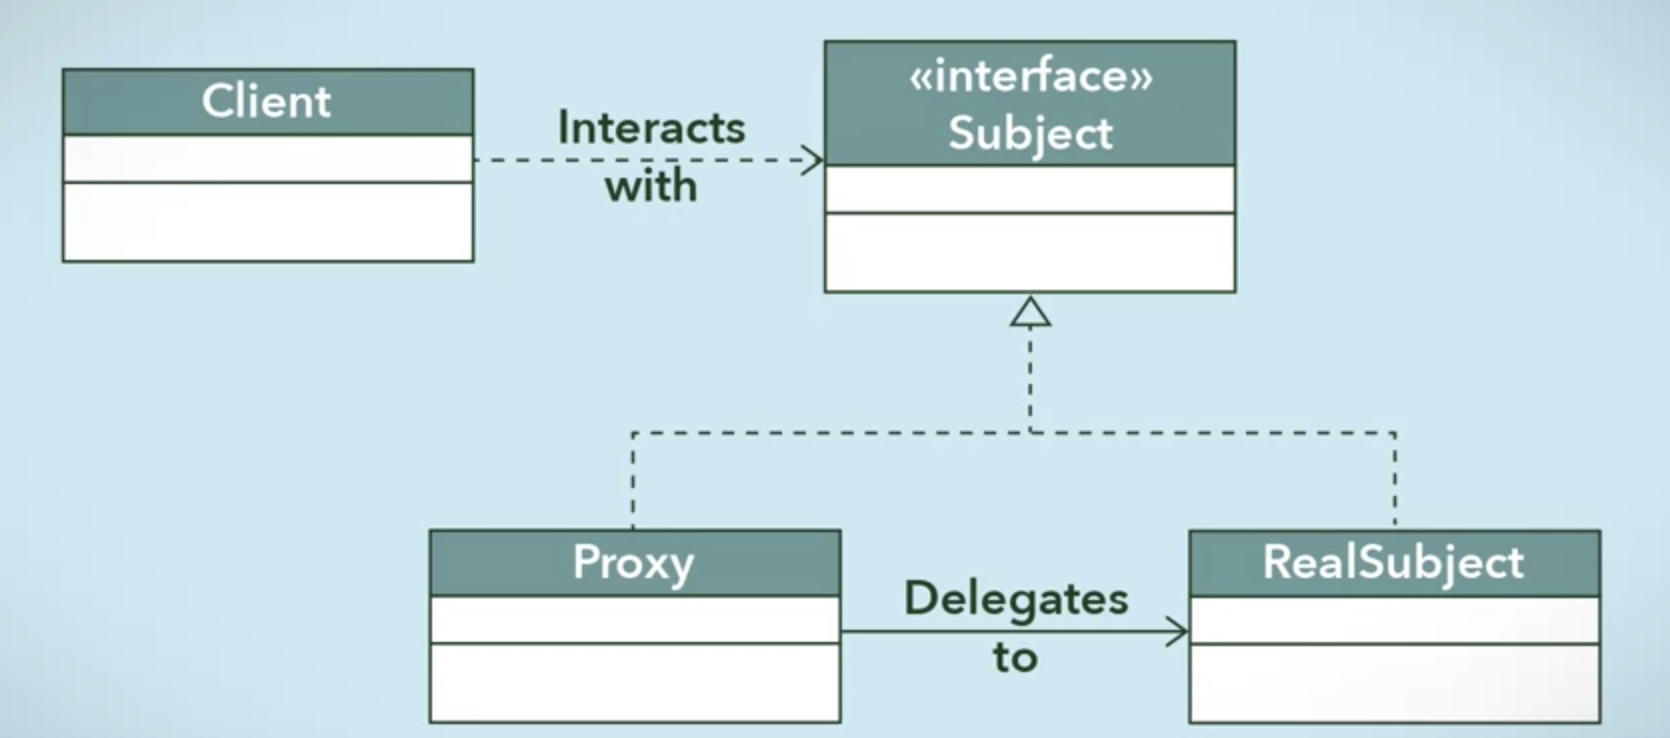

- Example
    - Lets's suppsoe you run an online retail store with global distribution and warehousing. How would you know which warehouse to route orders for best fulfillment?
        - e.g. You want to avoid routing to warehouses with no stock
    - Solution: Use proxy to pretect warehouses that don't have enough stock to fulfill order

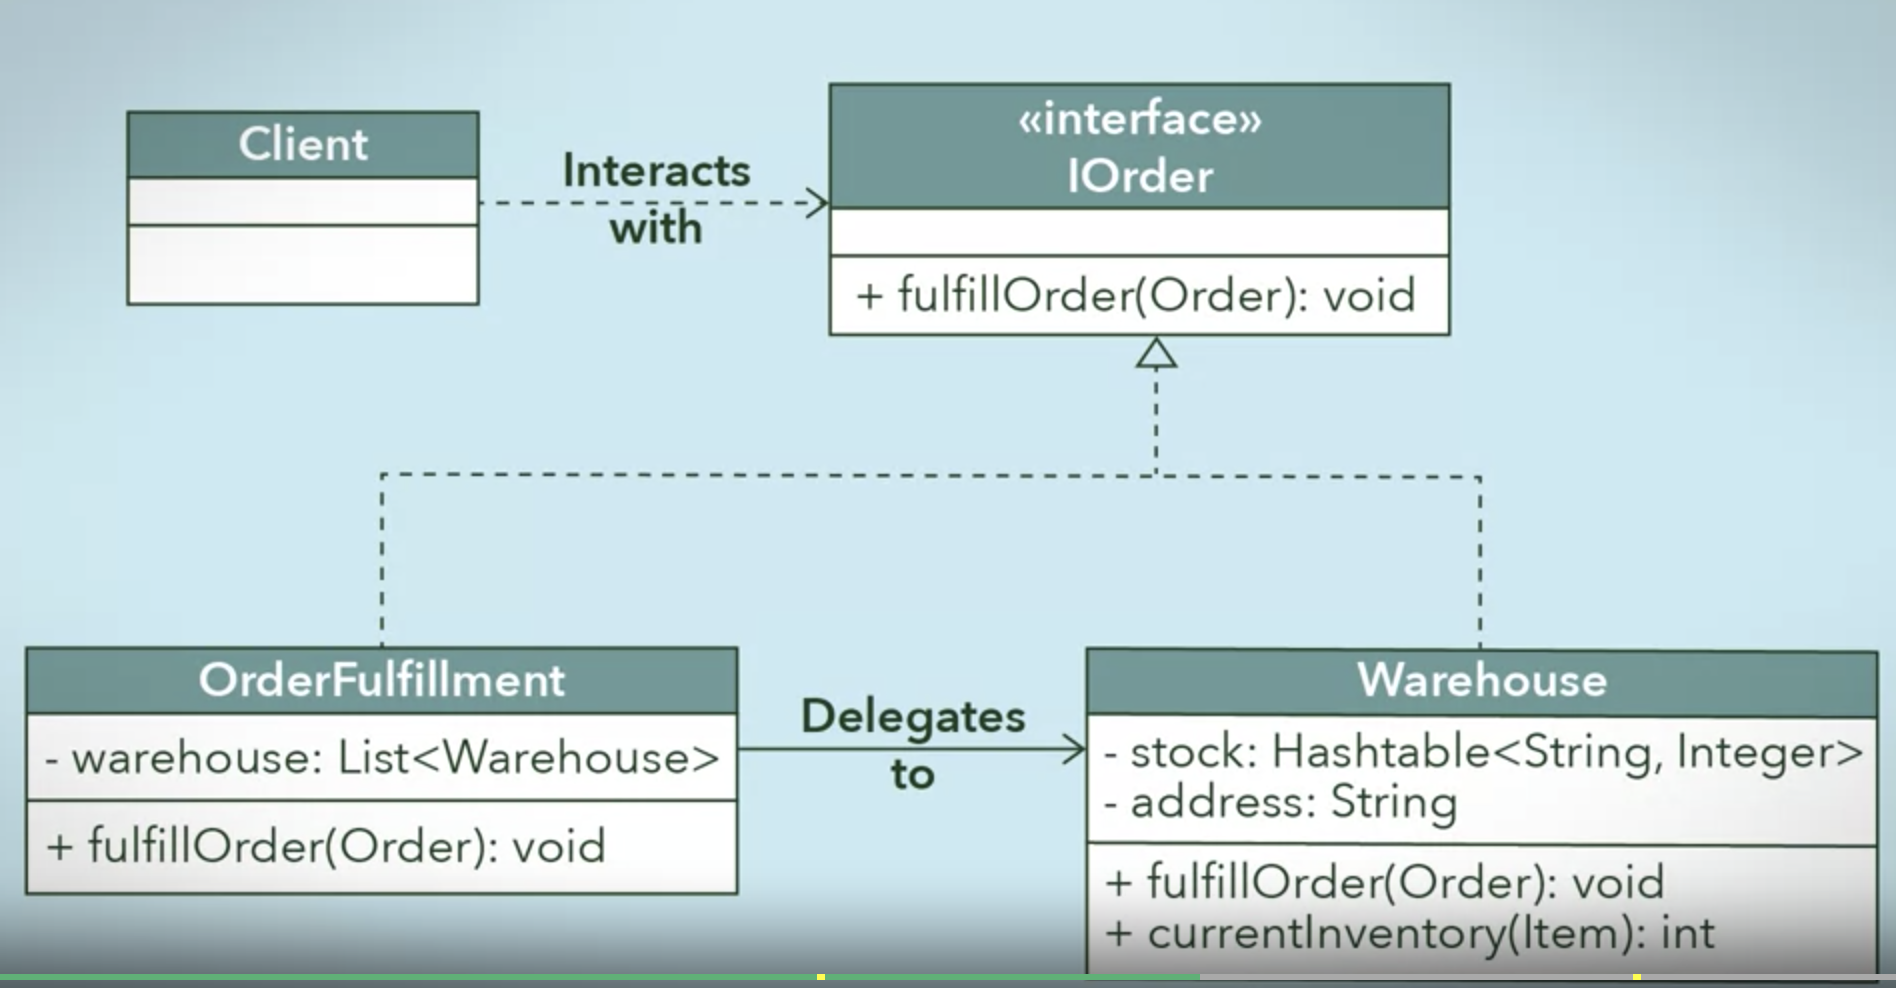

In [2]:
from abc import ABCMeta, abstractmethod

class IOrder(metaclass=ABCMeta):
    @abstractmethod
    def fulfillOrder(self, order: Order):
        ...

class Warehouse(IOrder):
    def __init__(self):
        self.stock: dict[str, int] = {}
        self.address: str = ''

    def fulfillOrder(self, order: Order):
        for item in order.itemList:
            self.stock[item.sku] = self.stock.get(item.sku, 0) - 1 if self.stock.get(item.sku, 0) != 0 else 0

    def currentInventory(self, item: Item):
        return self.stock.get(item.sku, 0)
    
class OrderFulfillment(IOrder):
    def __init__(self):
        self.__warehouses: list[Warehouse] = []

    def fulfillOrder(self, order: Order):
        '''
        For each item, check warehouse to see if it is in stock. 
            If it is, create order. 
            Else go to next warehouse
        Once done iterating, send all orders to warehouse
        '''
        for item in order.itemList:
            for warehouse in self.__warehouses:
                ...
        return 


- Notice how the system above doesn't send orders to the warehouse until it has confirmed that the order can be fulfilled
- It also lets you separate order validation and order fulfillment
- Each warehouse doesn't have to worry about rerouting orders

## Decorator Pattern

- It is often useful to combine different classes to achieve different behaviours
    - Like when you make coffee, you can combine coffee, milk, cream, chocolate, sugar etc. in different proportions to make different types of coffee
- However, trying to do this often leads to a combinatorial problem; the number of classes you need explodes!
- Can we dynamically attach different behaviours and responsibilities to classes? 
    - YES! Use `decorator` design pattern
    - Uses **aggregation** to combine behaviours at run time
    - Defines a "has a", or "weak containment" relation between 2 objects
- The implementation of this pattern uses both `interfaces` and `inheritance` so that classes conform to a common type whose instances can be stacked up in a compatible way


- In UML diagram below
    - ConcreteComponent: Coffee
    - ConcreteDecorator: Milk, sugar etc.
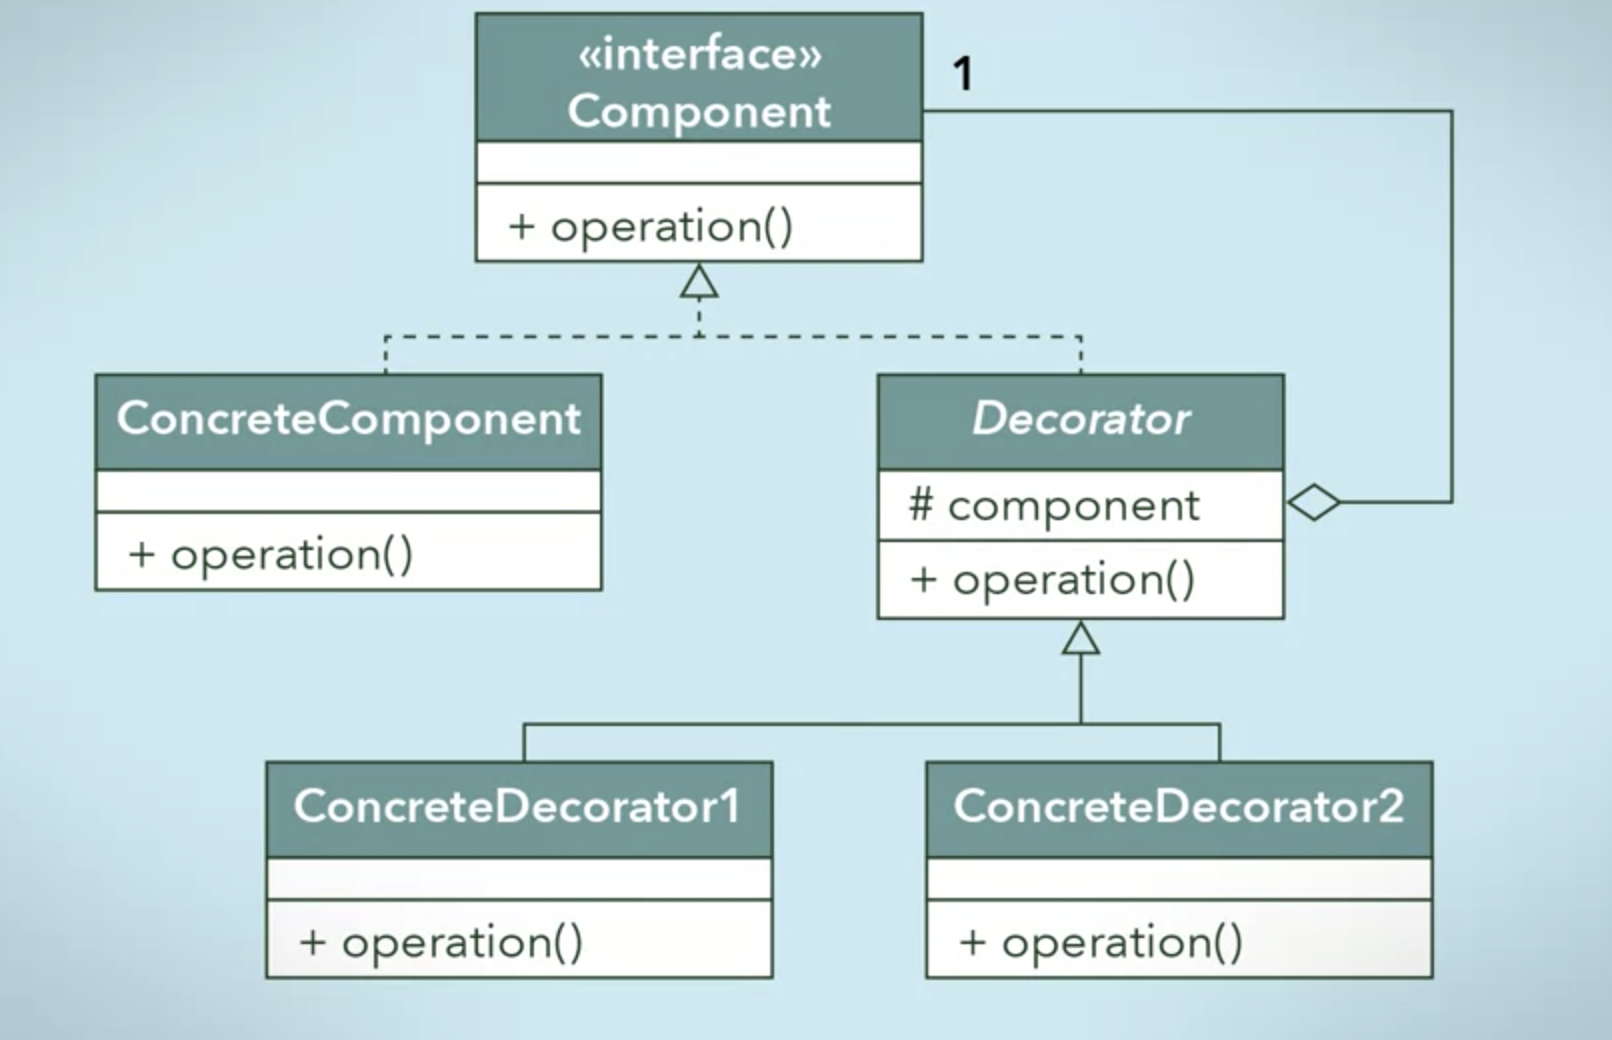

- Example:
    - We want to build a web page. Base type is a `webpage` class
    - But some pages require authentication, caching etc
    - You don't want new classes for every combination of behaviour a page can have
    - Solution: Decorators to modify base class!!

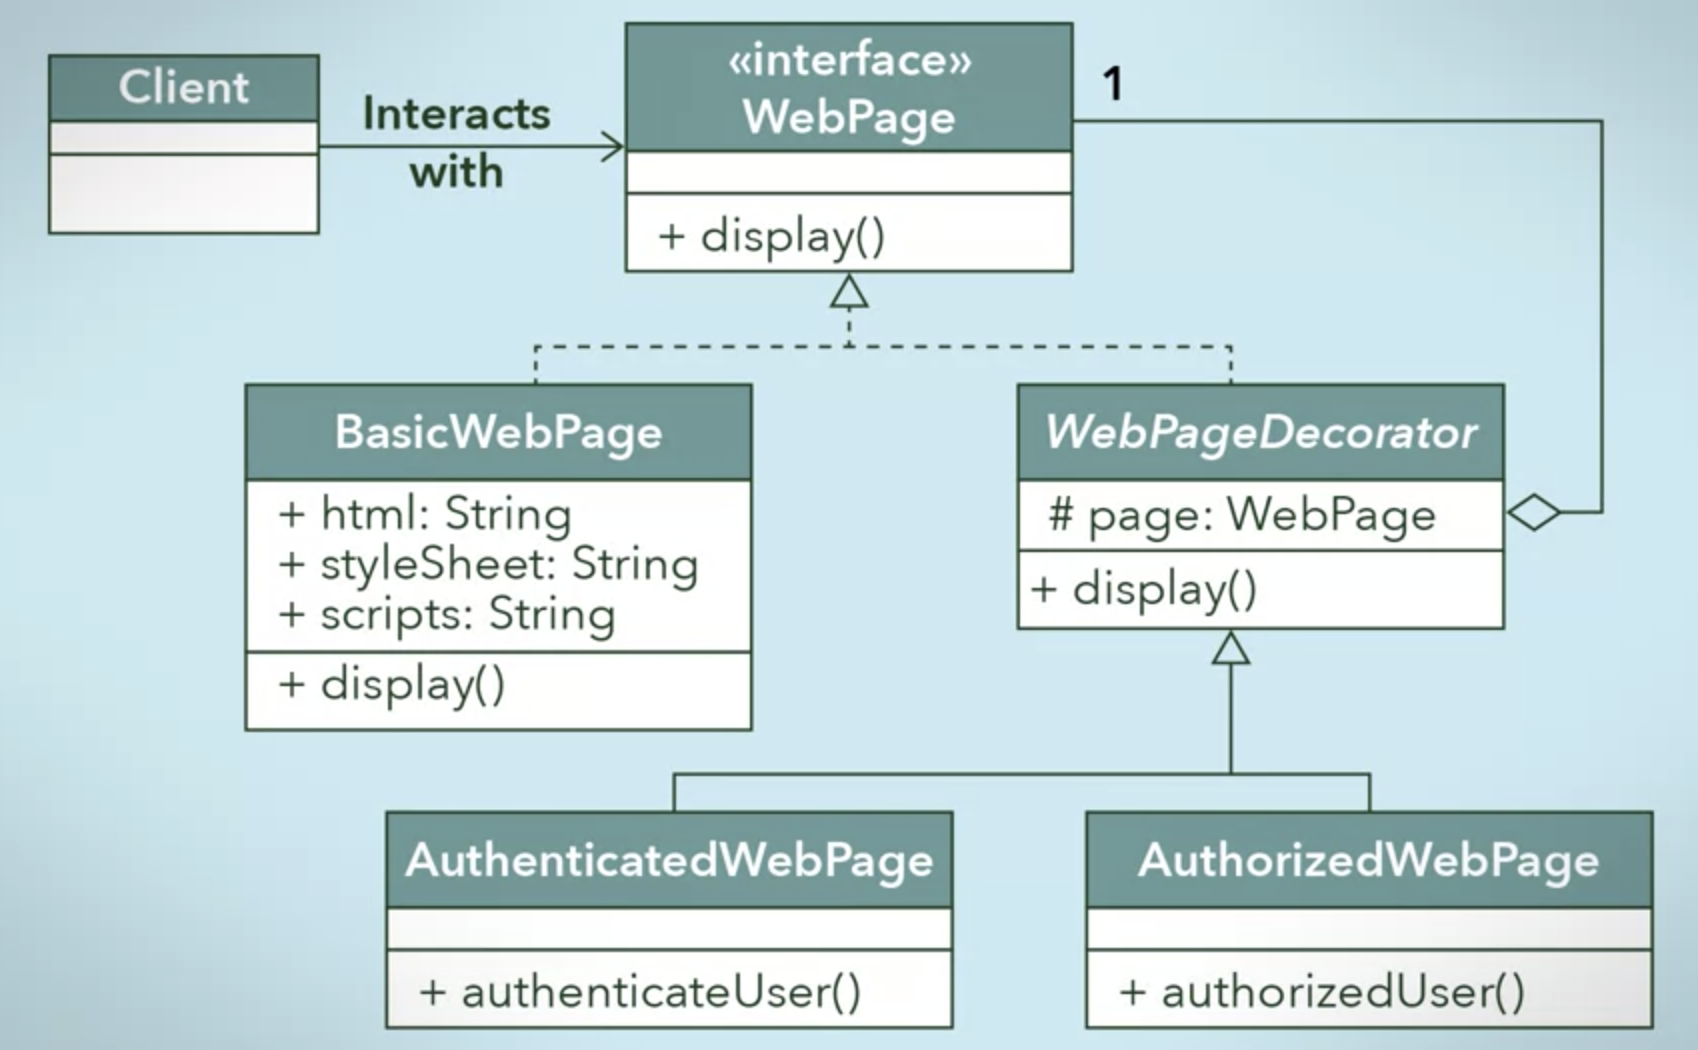

In [7]:
from abc import ABCMeta, abstractmethod

class WebPage(metaclass=ABCMeta):
    @abstractmethod
    def display(self):
        ...

class BasicWebPage(WebPage):
    def __init__(self):
        self.__html: str = ''
        self.__stylesheets: str = ''
        self.__scripts: str = ''
    
    def display(self):
        print("Display from BasicWebPage: Basic web page")

class WebPageDecorator(WebPage):
    def __init__(self, webPage: WebPage):
        self.page: WebPage = webPage

    def WebPageDecorator(self, webPage: WebPage):
        self.page = webPage

    def display(self):
        self.page.display()

class AuthorisedWebPage(WebPageDecorator):
    def authorisedUser(self):
        print("Authorising user")

    def display(self):
        super().display()
        self.authorisedUser()

class AuthenticatedWebPage(WebPageDecorator):
    def authenticateUser(self):
        print("Authenticating user")

    def display(self):
        super().display()
        self.authenticateUser()


base = BasicWebPage()
base.display()
decorator_authorised = AuthorisedWebPage(base)
decorator_authorised.display()
decorator_authorised_authenticate = AuthenticatedWebPage(decorator_authorised)
decorator_authorised_authenticate.display()


Display from BasicWebPage: Basic web page
Display from BasicWebPage: Basic web page
Authorising user
Display from BasicWebPage: Basic web page
Authorising user
Authenticating user
